In [2]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('C:/Users/User/Desktop/데브코스/2차 프로젝트/shopping_trends_updated1.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_new,Age_group,location_new
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,tops,50s,South
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,tops,10-20s,Northeast


### gender - Item Purchased_new

In [4]:
male = df['Gender']=='Male'
female = df['Gender']=='Female'

# 남녀 비율비교
nomal_gender_item = pd.DataFrame({'Male':round(df[male]['Item Purchased_new'].value_counts(normalize = True)*100,2),'Female': round(df[female]['Item Purchased_new'].value_counts(normalize = True)*100,2)})
#print('성별에 따른 상품별 구매 수(정규화) : ','\n',nomal_gender_item)
nomal_gender_item['differ_male'] = nomal_gender_item.Male / nomal_gender_item.Female
nomal_gender_item['differ_female'] = nomal_gender_item.Female / nomal_gender_item.Male
nomal_gender_item['rank_male'] = nomal_gender_item.Male.rank(method='min', ascending = False).astype('int')
nomal_gender_item['rank_female'] = nomal_gender_item.Female.rank(method='min',ascending = False).astype('int')
nomal_gender_item.sort_values(by = 'rank_male', ascending = False)
#nomal_gender_item.sort_values(by = 'rank_female', ascending = True)

# rank합을 통해 공통 선호색상을 확인하고자 함.
nomal_gender_item['total'] =(nomal_gender_item['Male'] + nomal_gender_item['Female'])
nomal_gender_item.sort_values(by = 'total', ascending = False)

,Male,Female,differ_male,differ_female,rank_male,rank_female,total
tops,19.98,21.79,0.916934,1.090591,2,1,41.77
bottoms,20.74,18.11,1.145224,0.873192,1,2,38.85
wear_acc,15.76,15.38,1.024707,0.975888,3,4,31.14
shoes,15.08,15.95,0.945455,1.057692,4,3,31.03
accessories,12.44,13.06,0.952527,1.049839,5,5,25.50
outers,8.41,8.09,1.039555,0.961950,6,6,16.50
bags,7.58,7.61,0.996058,1.003958,7,7,15.19


기존 differ 변수는 Male, Female변수의 차이로 계산했으나 해석이 모호함(각 성별의 비율의 차이가 얼마나 큰지 판단이 어려움) 따라서 성별 비율로 계산해 남성의 선호도가 여성의 몇배이다. 식으로 해석이 가능
중분류에서는 크게 선호하는 개체는 찾기 어려움.

In [5]:
# 소분류 비교
# 남녀 비율비교
nomal_gender_item = pd.DataFrame({'Male':round(df[male]['Item Purchased'].value_counts(normalize = True)*100,2),'Female': round(df[female]['Item Purchased'].value_counts(normalize = True)*100,2)})
#print('성별에 따른 상품별 구매 수(정규화) : ','\n',nomal_gender_item)
nomal_gender_item['differ_male'] = nomal_gender_item.Male / nomal_gender_item.Female
nomal_gender_item['differ_female'] = nomal_gender_item.Female / nomal_gender_item.Male
nomal_gender_item['rank_male'] = nomal_gender_item.Male.rank(method='min', ascending = False).astype('int')
nomal_gender_item['rank_female'] = nomal_gender_item.Female.rank(method='min',ascending = False).astype('int')
nomal_gender_item.sort_values(by = 'differ_male', ascending = False).head(6)
nomal_gender_item.sort_values(by = 'differ_female', ascending = False).head(6)

,Male,Female,differ_male,differ_female,rank_male,rank_female
Blouse,3.96,5.29,0.748582,1.335859,13,1
Handbag,3.58,4.65,0.769892,1.298883,23,4
Sandals,3.81,4.73,0.805497,1.241470,19,2
Socks,3.81,4.65,0.819355,1.220472,19,4
Shirt,4.15,4.73,0.877378,1.139759,7,2
Sunglasses,3.96,4.49,0.881960,1.133838,13,6


Blouse : 여성이 남성보다 구매율이 34% 높다
jeans : 남성이 여성보다 구매율이 54% 높다.  

### gender - location

In [6]:
# 남녀별 구매장소
nomal_gender_Location = pd.DataFrame({'Male':round(df[male]['location_new'].value_counts(normalize = True)*100,2),'Female': round(df[female]['location_new'].value_counts(normalize = True)*100,2)})
nomal_gender_Location['differ_male'] = nomal_gender_Location.Male / nomal_gender_Location.Female
nomal_gender_Location['differ_female'] = nomal_gender_Location.Female / nomal_gender_Location.Male
nomal_gender_Location['rank_male'] = nomal_gender_Location.Male.rank(method='min', ascending = False).astype('int')
nomal_gender_Location['rank_female'] = nomal_gender_Location.Female.rank(method='min',ascending = False).astype('int')


# rank합을 통해 공통 선호색상을 확인하고자 함.
nomal_gender_Location['total'] =(nomal_gender_Location['Male'] + nomal_gender_Location['Female'])
nomal_gender_Location.sort_values(by = 'total', ascending = False)

,Male,Female,differ_male,differ_female,rank_male,rank_female,total
West,29.49,31.09,0.948537,1.054256,1,1,60.58
South,28.81,28.45,1.012654,0.987504,2,2,57.26
Midwest,24.32,23.40,1.039316,0.962171,3,3,47.72
Northeast,17.38,17.07,1.018161,0.982163,4,4,34.45


성별에 따라 구매하는 지역을 찾기 어렵다.

In [7]:
nomal_gender_Location = pd.DataFrame({'Male':round(df[male]['Location'].value_counts(normalize = True)*100,2),'Female': round(df[female]['Location'].value_counts(normalize = True)*100,2)})
nomal_gender_Location['differ_male'] = nomal_gender_Location.Male / nomal_gender_Location.Female
nomal_gender_Location['differ_female'] = nomal_gender_Location.Female / nomal_gender_Location.Male
nomal_gender_Location.sort_values(by = 'differ_male', ascending = False).head(6)
#nomal_gender_Location.sort_values(by = 'differ_female', ascending = False).head(6)

,Male,Female,differ_male,differ_female
Indiana,2.34,1.36,1.720588,0.581197
Hawaii,1.92,1.12,1.714286,0.583333
Missouri,2.38,1.44,1.652778,0.605042
Massachusetts,2.11,1.28,1.648437,0.606635
Iowa,1.96,1.36,1.441176,0.693878
New Mexico,2.30,1.60,1.437500,0.695652


소분류로 확인했을 때 비율차이가 발생함을 확인할 수 있다.

### gender - color

In [8]:
nomal_gender_Color = pd.DataFrame({'Male':round(df[male]['Color'].value_counts(normalize = True)*100,2),'Female': round(df[female]['Color'].value_counts(normalize = True)*100,2)})
nomal_gender_Color['differ_male'] = nomal_gender_Color.Male / nomal_gender_Color.Female
nomal_gender_Color['differ_female'] = nomal_gender_Color.Female / nomal_gender_Color.Male
nomal_gender_Color.sort_values(by = 'differ_male', ascending = False).head(6)
#nomal_gender_Color.sort_values(by = 'differ_female', ascending = False).head(6)

,Male,Female,differ_male,differ_female
Beige,4.03,3.21,1.255452,0.796526
Turquoise,3.96,3.21,1.233645,0.810606
Purple,4.11,3.37,1.219585,0.819951
Cyan,4.49,3.77,1.190981,0.839644
Gold,3.66,3.29,1.112462,0.898907
Red,3.92,3.53,1.110482,0.900510


beige, turquoise, purple : 남성의 구매율이 20%이상 높다  
pink magenta : 여성의 구매율이 20% 이상 높다.

### item - 

In [9]:
# 도수분포
pd.DataFrame({'item':df['Item Purchased_new'].value_counts(), 'rank': df['Item Purchased_new'].value_counts().rank(method='min', ascending=False )})

,item,rank
tops,802,1.0
bottoms,776,2.0
wear_acc,610,3.0
shoes,599,4.0
accessories,493,5.0
outers,324,6.0
bags,296,7.0


In [10]:
# item - location
item_location = pd.crosstab(df['Item Purchased_new'], df['location_new']);item_location
item_location_ratio_columns = pd.crosstab(df['Item Purchased_new'], df['location_new'], normalize = 'columns');item_location_ratio_columns
item_location_ratio_index = pd.crosstab(df['Item Purchased_new'], df['location_new'], normalize = 'index');item_location_ratio_index

location_new,Midwest,Northeast,South,West
Item Purchased_new,,,,
accessories,0.255578,0.170385,0.281947,0.292089
bags,0.209459,0.148649,0.287162,0.354730
bottoms,0.234536,0.173969,0.292526,0.298969
outers,0.243827,0.179012,0.253086,0.324074
shoes,0.265442,0.180301,0.275459,0.278798
tops,0.230673,0.169576,0.291771,0.307980
wear_acc,0.236066,0.178689,0.306557,0.278689


In [13]:
item_location

location_new,Midwest,Northeast,South,West
Item Purchased_new,,,,
accessories,126,84,139,144
bags,62,44,85,105
bottoms,182,135,227,232
outers,79,58,82,105
shoes,159,108,165,167
tops,185,136,234,247
wear_acc,144,109,187,170


Text(0.5, 1.0, 'item by location')

<Figure size 1080x1080 with 0 Axes>

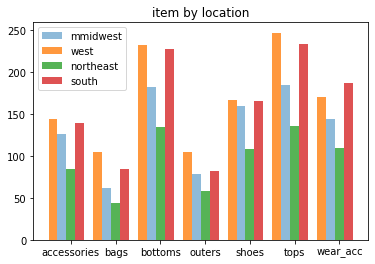

In [31]:
plt.figure(figsize = (15,15))

x = np.arange(item_location.shape[0])
width = 0.2


fig, axes = plt.subplots()
axes.bar(x-width, item_location.Midwest,  width,align='center',alpha=0.5)
axes.bar(x-2*width, item_location.West, width,align='center',alpha=0.8)
axes.bar(x, item_location.Northeast, width,align='center',alpha=0.8)
axes.bar(x + width, item_location.South, width,align='center',alpha=0.8)
plt.xticks(x)
axes.set_xticklabels(item_location.index)
plt.legend(['mmidwest','west','northeast','south'])
plt.title('item by location')

In [ ]:
plt.figure(figsize = (10,15))
for i in range(item_location.shape[0]):
    plt.subplot(4,2,i+1)
    plt.bar(item_location.columns, item_location.iloc[i])
    #plt.ylim(0,250)
    plt.title(item_location.index[i])

서부, 남부에 구매수가 많고 북부는 상대적으로 적어 전체적으로 서부, 남부가 높은 경향을 보인다.  
2020년 기준 지역별 인구수  
출처. https://www.census.gov/library/stories/2021/08/more-than-half-of-united-states-counties-were-smaller-in-2020-than-in-2010.html  
중서부 6899만  
북동부 5761만  
남부 11456만  
서부 7194만  
  
  
데이터 편향문제보다 기존 인구수가 많아 발생한 것으로 보임. 
중서부, 서부, 남부를 비교했을 때 서부에서 outers, bags에서 구매량이 많은 것으로 보인다.

In [ ]:
plt.figure(figsize = (10,15))
for idx in range(item_location_ratio_columns.shape[0]):
    plt.subplot(4,2,idx+1)
    plt.bar(item_location_ratio_columns.columns, item_location_ratio_columns.iloc[idx])
    plt.title(item_location_ratio_columns.index[idx])

지역에서 각 item의 구매비율을 시각화  
bags, outers에서 서부의 구매율이 높으며 shoes에서 중서부의 구매율이 높음을 확인.  
다만 유의미하게 높은지 판단기준 필요

Text(0.5, 1.0, 'item by location : female')

<Figure size 1080x1080 with 0 Axes>

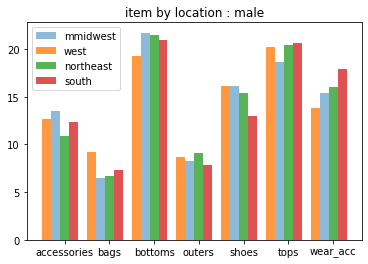

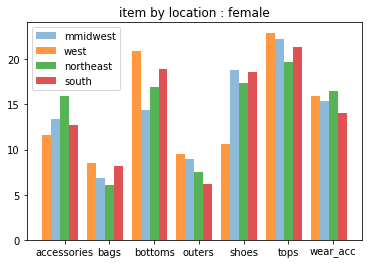

In [39]:
# 지역별 남녀 비율 확인
# 조건식
male = df['Gender']=='Male'
female = df['Gender']=='Female'

# 테이블 생성
item_location_male = pd.crosstab(df[male]['Item Purchased_new'], df[male]['location_new'], margins = True);
item_location_female = pd.crosstab(df[female]['Item Purchased_new'], df[female]['location_new'], margins = True);

item_location_male_ratio = round(pd.crosstab(index = df[male]['Item Purchased_new'], columns = df[male]['location_new'], normalize=1)*100,2)
item_location_female_ratio = round(pd.crosstab(index = df[female]['Item Purchased_new'], columns = df[female]['location_new'], normalize=1)*100,2)


# colname 수정
#item_location_male.columns = ['male_Midwest','male_Northeast','male_South','male_West', 'male_All']
#item_location_female.columns = ['female_Midwest','female_Northeast','female_South','female_West', 'female_All']

#item_location_male_ratio.columns = ['male_Midwest','male_Northeast','male_South','male_West']
#item_location_female_ratio.columns = ['female_Midwest','female_Northeast','female_South','female_West']

# 테이블 병합
gender_item_loca_ratio = pd.concat([item_location_male_ratio,item_location_female_ratio],axis = 1)
gender_item_loca= pd.concat([item_location_male,item_location_female],axis = 1)

# 시각화
plt.figure(figsize = (15,15))

x = np.arange(gender_item_loca_ratio.shape[0])
width = 0.35

x = np.arange(item_location.shape[0])
width = 0.2
item_location_male_ratio

fig, axes = plt.subplots()
axes.bar(x-width, item_location_male_ratio.Midwest,  width,align='center',alpha=0.5)
axes.bar(x-2*width, item_location_male_ratio.West, width,align='center',alpha=0.8)
axes.bar(x, item_location_male_ratio.Northeast, width,align='center',alpha=0.8)
axes.bar(x + width, item_location_male_ratio.South, width,align='center',alpha=0.8)
plt.xticks(x)
axes.set_xticklabels(item_location.index)
plt.legend(['mmidwest','west','northeast','south'])
plt.title('item by location : male')

fig, axes = plt.subplots()
axes.bar(x-width, item_location_female_ratio.Midwest,  width,align='center',alpha=0.5)
axes.bar(x-2*width, item_location_female_ratio.West, width,align='center',alpha=0.8)
axes.bar(x, item_location_female_ratio.Northeast, width,align='center',alpha=0.8)
axes.bar(x + width, item_location_female_ratio.South, width,align='center',alpha=0.8)
plt.xticks(x)
axes.set_xticklabels(item_location.index)
plt.legend(['mmidwest','west','northeast','south'])
plt.title('item by location : female')

In [203]:
gender_item_loca_ratio

,female_Midwest,female_Northeast,female_South,female_West,Midwest,Northeast,South,West
Item Purchased_new,,,,,,,,
accessories,13.49,10.85,12.30,12.66,13.36,15.96,12.68,11.60
bags,6.51,6.72,7.33,9.21,6.85,6.10,8.17,8.51
bottoms,21.71,21.48,20.94,19.31,14.38,16.90,18.87,20.88
outers,8.22,9.11,7.85,8.70,8.90,7.51,6.20,9.54
shoes,16.12,15.40,12.96,16.11,18.84,17.37,18.59,10.57
tops,18.60,20.39,20.68,20.20,22.26,19.72,21.41,22.94
wear_acc,15.35,16.05,17.93,13.81,15.41,16.43,14.08,15.98


### item - size (by gender)

In [228]:
item_size = pd.crosstab(df['Item Purchased_new'], df['Size'],margins=True);
item_size # 사이즈별 수치가 크게차이남. 비율로 계산
#item_size = pd.crosstab(df['Item Purchased_new'], df['Size'],normalize = 'columns');
item_size

Size,L,M,S,XL,All
Item Purchased_new,,,,,
accessories,117,216,110,50,493
bags,69,148,47,32,296
bottoms,231,332,132,81,776
outers,93,148,56,27,324
shoes,172,267,93,67,599
tops,210,372,126,94,802
wear_acc,161,272,99,78,610
All,1053,1755,663,429,3900


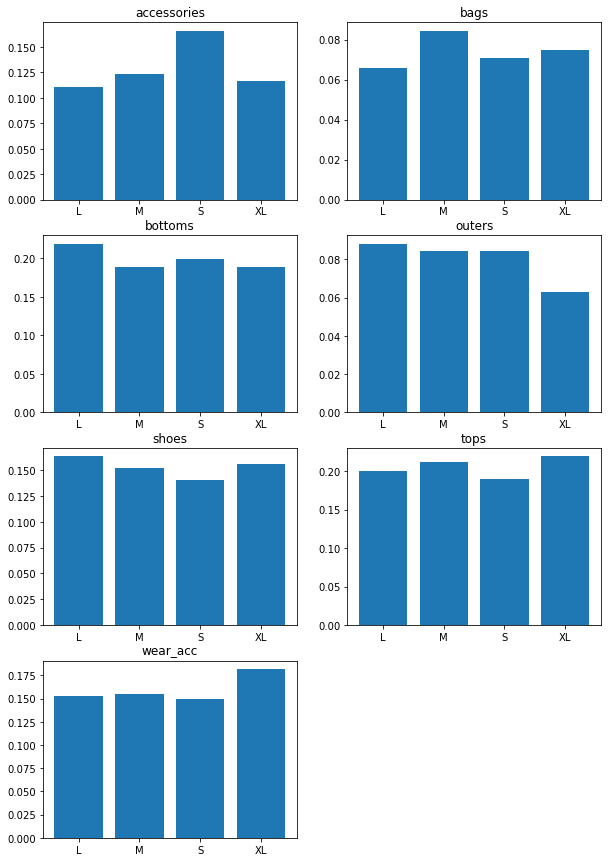

In [146]:
plt.figure(figsize = (10,15))
for idx in range(item_size.shape[0]):
    plt.subplot(4,2,idx+1)
    plt.bar(item_size.columns, item_size.iloc[idx])
    plt.title(item_size.index[idx])

악세사리에서 S 사이즈가 많이 구매됨. 

gender_item_size 
                     male_L  male_M  male_S  male_XL  male_All  female_L  \
Item Purchased_new                                                        
accessories             73     142      73       42       330        44   
bags                    46      97      38       20       201        23   
bottoms                158     229     102       61       550        73   
outers                  62     102      38       21       223        31   
shoes                  117     177      67       39       400        55   
tops                   142     238      85       65       530        68   
wear_acc               118     180      73       47       418        43   
All                    716    1165     476      295      2652       337   

                    female_M  female_S  female_XL  female_All  
Item Purchased_new                                             
accessories               74        37          8         163  
bags                      51         9

Text(0.5, 1.0, 'size M per gender')

<Figure size 1080x1080 with 0 Axes>

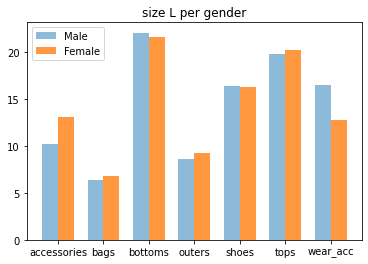

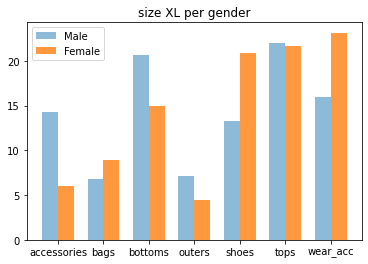

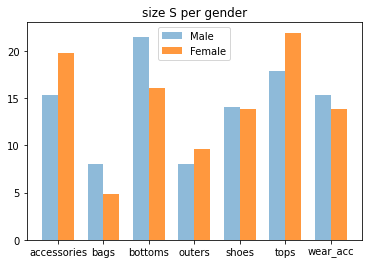

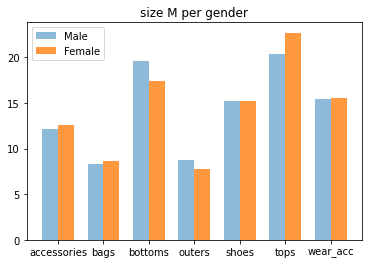

In [217]:
# 남녀 사이즈 비교
# 조건식
male = df['Gender']=='Male'
female = df['Gender']=='Female'

# 테이블 생성
size_item_male = pd.crosstab(index = df[male]['Item Purchased_new'], columns = df[male]['Size'], margins=True)
size_item_female = pd.crosstab(index = df[female]['Item Purchased_new'], columns = df[female]['Size'], margins = True)

size_item_male_ratio = round(pd.crosstab(index = df[male]['Item Purchased_new'], columns = df[male]['Size'], normalize=1)*100,2)
size_item_female_ratio = round(pd.crosstab(index = df[female]['Item Purchased_new'], columns = df[female]['Size'], normalize=1)*100,2)

# colname 수정
size_item_male.columns = ['male_L','male_M','male_S','male_XL', 'male_All']
size_item_female.columns = ['female_L','female_M','female_S','female_XL', 'female_All']

size_item_male_ratio.columns = ['male_L','male_M','male_S','male_XL']
size_item_female_ratio.columns = ['female_L','female_M','female_S','female_XL']

# 테이블 병합
gender_item_size_ratio = pd.concat([size_item_male_ratio,size_item_female_ratio],axis = 1);gender_color_size
gender_item_size = pd.concat([size_item_male,size_item_female],axis = 1);gender_color_size

print('gender_item_size \n',gender_item_size)
plt.figure(figsize = (15,15))

x = np.arange(gender_color_size_ratio.shape[0])
width = 0.35


fig, axes = plt.subplots()
axes.bar(x-width/2, gender_item_size_ratio.male_L,  width,align='center',alpha=0.5)
axes.bar(x+width/2, gender_item_size_ratio.female_L, width,align='center',alpha=0.8)
plt.xticks(x)
axes.set_xticklabels(gender_item_size_ratio.index)
plt.legend(['Male','Female'])
plt.title('size L per gender')

fig, axes = plt.subplots()
axes.bar(x-width/2, gender_item_size_ratio.male_XL,  width,align='center',alpha=0.5)
axes.bar(x+width/2, gender_item_size_ratio.female_XL, width,align='center',alpha=0.8)
plt.xticks(x)
axes.set_xticklabels(gender_item_size_ratio.index)
plt.legend(['Male','Female'])
plt.title('size XL per gender')

fig, axes = plt.subplots()
axes.bar(x-width/2, gender_item_size_ratio.male_S,  width,align='center',alpha=0.5)
axes.bar(x+width/2, gender_item_size_ratio.female_S, width,align='center',alpha=0.8)
plt.xticks(x)
axes.set_xticklabels(gender_item_size_ratio.index)
plt.legend(['Male','Female'])
plt.title('size S per gender')

fig, axes = plt.subplots()
axes.bar(x-width/2, gender_item_size_ratio.male_M,  width,align='center',alpha=0.5)
axes.bar(x+width/2, gender_item_size_ratio.female_M, width,align='center',alpha=0.8)
plt.xticks(x)
axes.set_xticklabels(gender_item_size_ratio.index)
plt.legend(['Male','Female'])
plt.title('size M per gender')

L 사이즈에서 남녀의 차이는 크게 나타나지 않는다.  
XL 사이즈에서 악세사리, 하의는 남성이 높지만 wear_acc, shoes은 여성의 비율이 높다.  
S 사이즈에서 여성의 상의, 액세서리 구매율이 높고 남성의 하의 구매율이 높다.  
M 사이즈에서 남녀의 차이는 크게 보이지 않는다.

### season별 item

Season,Fall,Spring,Summer,Winter,All
Item Purchased_new,,,,,
accessories,115,116,123,139,493
bags,82,75,80,59,296
bottoms,187,200,196,193,776
outers,88,81,75,80,324
shoes,136,163,160,140,599
tops,198,214,170,220,802
wear_acc,169,150,151,140,610
All,975,999,955,971,3900


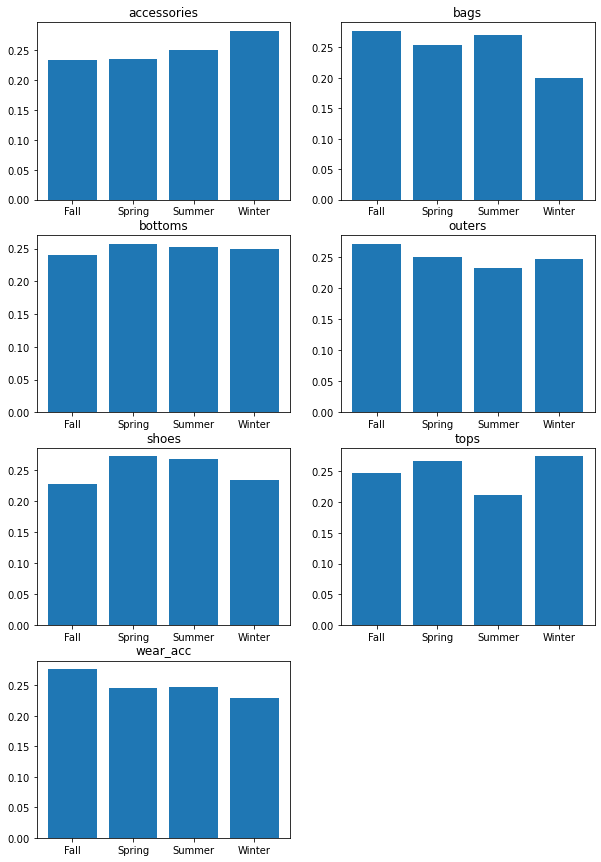

In [41]:
item_season = pd.crosstab(df['Item Purchased_new'], df['Season'], normalize = 'index');item_season

# 시각화
plt.figure(figsize = (10,15))
for idx in range(item_season.shape[0]):
    plt.subplot(4,2,idx+1)
    plt.bar(item_season.columns, item_season.iloc[idx])
    plt.title(item_season.index[idx])
pd.crosstab(df['Item Purchased_new'], df['Season'],margins = True)

gender_item_season 
 Season               Fall  Spring  Summer  Winter   Fall  Spring  Summer  \
Item Purchased_new                                                         
accessories         11.59   11.86   13.09   13.23  12.20   11.08   12.42   
bags                 8.66    7.32    7.61    6.77   7.93    7.91   10.07   
bottoms             19.63   20.94   21.31   21.05  18.29   18.04   18.79   
outers               9.74    7.61    7.61    8.72   7.62    9.18    8.39   
shoes               14.68   14.20   17.20   14.29  12.50   20.89   15.77   
tops                19.78   21.08   17.50   21.50  21.34   22.15   18.46   
wear_acc            15.92   16.98   15.68   14.44  20.12   10.76   16.11   

Season              Winter  
Item Purchased_new          
accessories          16.67  
bags                  4.58  
bottoms              17.32  
outers                7.19  
shoes                14.71  
tops                 25.16  
wear_acc             14.38  


Text(0.5, 1.0, 'Fall per gender')

<Figure size 1080x1080 with 0 Axes>

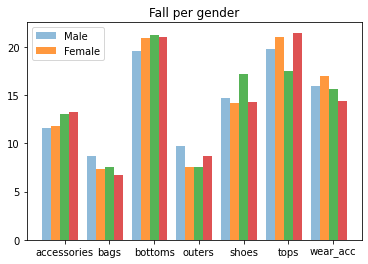

In [49]:
# 남녀 시즌별 item 구매경향 비교
# 조건식
male = df['Gender']=='Male'
female = df['Gender']=='Female'

# 테이블 생성
item_season_male = pd.crosstab(index = df[male]['Item Purchased_new'], columns = df[male]['Season'], margins=True)
item_season_female = pd.crosstab(index = df[female]['Item Purchased_new'], columns = df[female]['Season'], margins = True)

item_season_male_ratio = round(pd.crosstab(index = df[male]['Item Purchased_new'], columns = df[male]['Season'], normalize=1)*100,2)
item_season_female_ratio = round(pd.crosstab(index = df[female]['Item Purchased_new'], columns = df[female]['Season'], normalize=1)*100,2)

# colname 수정
#item_season_male.columns = ['male_Fall','male_Spring','male_Summer','male_Winter', 'male_All']
#item_season_female.columns = ['female_Fall','female_Spring','female_Summer','female_Winter', 'female_All']

#item_season_male_ratio.columns = ['male_Fall','male_Spring','male_Summer','male_Winter']
#item_season_female_ratio.columns = ['female_Fall','female_Spring','female_Summer','female_Winter']

# 테이블 병합
gender_item_season_ratio = pd.concat([item_season_male_ratio,item_season_female_ratio],axis = 1);
gender_item_season = pd.concat([item_season_male,item_season_female],axis = 1);

print('gender_item_season \n',gender_item_season_ratio)
plt.figure(figsize = (15,15))
item_season_male_ratio
fig, axes = plt.subplots()
axes.bar(x-2*width, item_season_male_ratio.Fall,  width,align='center',alpha=0.5)
axes.bar(x-width, item_season_male_ratio.Spring, width,align='center',alpha=0.8)
axes.bar(x, item_season_male_ratio.Summer, width,align='center',alpha=0.8)
axes.bar(x+width, item_season_male_ratio.Winter, width,align='center',alpha=0.8)
plt.xticks(x)
axes.set_xticklabels(gender_item_season_ratio.index)
plt.legend(['Male','Female'])
plt.title('Fall per gender')

